# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#RESET TO SIZE=1500 BEFORE FINAL COMMIT
lats = np.random.uniform(low=-90.000, high=90.000, size=30)
lngs = np.random.uniform(low=-180.000, high=180.000, size=30)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

28

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [79]:
url = "http://api.openweathermap.org/data/2.5/weather?"

clouds=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

# Make a request for each of the indices

for x in range(len(cities)):
    print(f"Making request number: {x} for ID: {cities[x]}")
    

    # Get one of the posts
    weather_response = requests.get(url + "q=" + str(cities[x]) +  "&APPID=" + weather_api_key).json()
    clouds.append(weather_response['clouds']['all'])
    country.append(weather_response['sys']['country'])
    date.append(weather_response['dt'])
    humidity.append(weather_response['main']['humidity'])
    lat.append(weather_response['coord']['lat'])
    lng.append(weather_response['coord']['lon'])
    max_temp.append(weather_response['main']['temp_max'])
    wind_speed.append(weather_response['wind']['speed'])


Making request number: 0 for ID: padang
Making request number: 1 for ID: san patricio
Making request number: 2 for ID: port blair
Making request number: 3 for ID: tottori
Making request number: 4 for ID: hilo
Making request number: 5 for ID: shihezi
Making request number: 6 for ID: punta arenas
Making request number: 7 for ID: albany
Making request number: 8 for ID: esperance
Making request number: 9 for ID: bluff
Making request number: 10 for ID: chalmette
Making request number: 11 for ID: vila
Making request number: 12 for ID: ushuaia
Making request number: 13 for ID: kirtipur
Making request number: 14 for ID: vanimo
Making request number: 15 for ID: resistencia
Making request number: 16 for ID: cherskiy
Making request number: 17 for ID: pierre
Making request number: 18 for ID: yellowknife
Making request number: 19 for ID: vaini
Making request number: 20 for ID: jurado
Making request number: 21 for ID: cuetzalan
Making request number: 22 for ID: lorengau
Making request number: 23 for

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [101]:
report=[','.join(map(str, i)) for i in zip(cities,clouds,country,date,humidity,lat,lng,max_temp,wind_speed)]
df1=pd.DataFrame(report)
df1['City']=cities
df1['Cloudiness']=clouds
df1['Country']=country
df1['Date']=date
df1['Humidity']=humidity
df1['Lat']=lat
df1['Lon']=lng
df1['Max Temp']=max_temp
df1['Wind Speed']=wind_speed
del df1[0]
df1
df1.to_csv("city_data.csv")


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

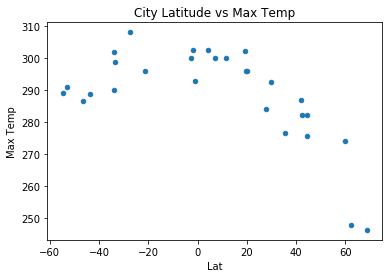

In [103]:
df1.plot(kind='scatter',x='Lat', y='Max Temp')
plt.title("City Latitude vs Max Temp")
plt.show()

#### Latitude vs. Humidity Plot

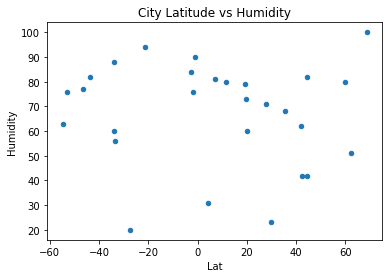

In [104]:
df1.plot(kind='scatter',x='Lat', y='Humidity')
plt.title("City Latitude vs Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

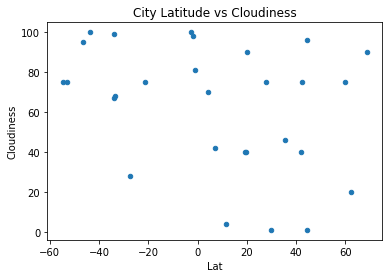

In [105]:
df1.plot(kind='scatter',x='Lat', y='Cloudiness')
plt.title("City Latitude vs Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

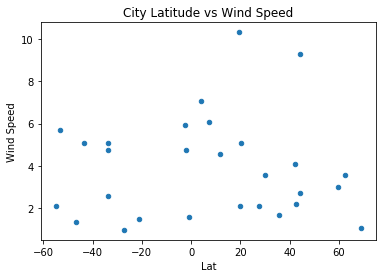

In [106]:
df1.plot(kind='scatter',x='Lat', y='Wind Speed')
plt.title("City Latitude vs Wind Speed")
plt.show()

## Linear Regression

Pearson R: -0.6


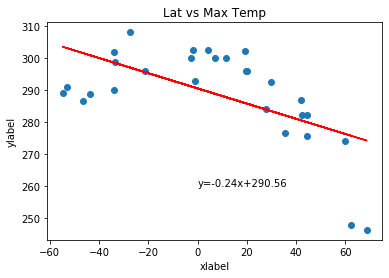

In [115]:

def linear (df3,x,y,):
    axis_x=df3.loc[:,x]
    axis_y=df3.loc[:,y]
    correlation=st.pearsonr(axis_x, axis_y)
    print(f"Pearson R: {round(correlation[0],2)}")
    plt.scatter(axis_x, axis_y)
    (slope, intercept, rvalue, pvalue, stderr)=linregress(axis_x,axis_y)
    regress_values=axis_x*slope+intercept
    plt.plot(axis_x,regress_values, "r-")
    line_eq="y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
    #need to automate xy
    plt.annotate(line_eq, (0,260))

    plt.title(x + " vs " + y)
    plt.xlabel("xlabel")
    plt.ylabel("ylabel")
    plt.show()
    
linear(df1,'Lat','Max Temp')


Pearson R: -0.6


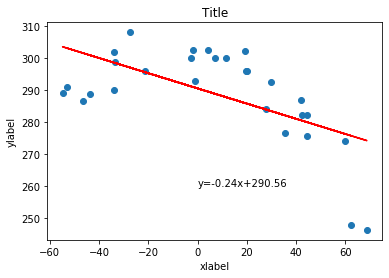

In [112]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression